In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score
from math import sqrt
import math

In [2]:
import torch_geometric

In [3]:
torch_geometric.seed_everything(23)

In [4]:
data = pd.read_csv('/Users/ed_aguilar/Documents/PhD_Documents/Experiments/Metal_carbides/Experiments_periodicity/NewData/Data/energy_descriptors_all.csv', index_col=0)
data['dft'] = (data['dft']-min(data['dft']))*13.605693122994
print(len(data))
data.sample(10)

1046


,dft,c,bv,ang
luis_738.vasp,3.136949,328,0.59283,32
ig_126.vasp,3.150780,332,0.61369,32
original_142.vasp,4.222354,352,0.68891,34
ig_73.vasp,3.726639,332,0.62534,32
ig_163.vasp,3.736915,324,0.65304,34
luis_675.vasp,3.009644,328,0.61642,30
luis_574.vasp,3.055994,328,0.62737,30
ig_206.vasp,2.147128,316,0.54135,26
luis_503.vasp,2.868057,328,0.61075,30
ig_26.vasp,3.100937,320,0.58011,30


In [5]:
y = data['dft']
x = np.array(data.iloc[:,1:4])

In [6]:
#folds = StratifiedKFold(n_splits=5, shuffle=False)
folds = KFold(n_splits=5, shuffle=True)
train_idx = []
test_idx = []

for i, (train, test) in enumerate(folds.split(x, y)):
    train_idx.append(train)
    test_idx.append(test)

In [7]:
kfold_idx = 0

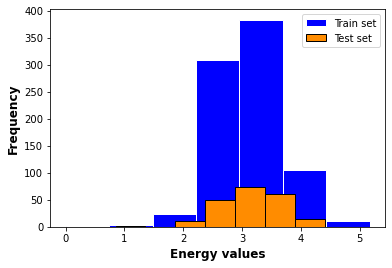

In [8]:
plt.plot(figsize = (12,8))
plt.hist(y[train_idx[kfold_idx]], 7, color = 'blue', label='Train set', edgecolor='white')
plt.hist(y[test_idx[kfold_idx]], 7, color = 'darkorange', label='Test set', edgecolor='black')
plt.xlabel('Energy values', fontweight ='bold', fontsize = 12)
plt.ylabel('Frequency', fontweight ='bold', fontsize = 12)
plt.legend()
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

In [11]:
def choose_model(best_params):
    if best_params == None:
        return LinearRegression()
        #return RandomForestRegressor()
        #return GradientBoostingRegressor()
    else:
        return LinearRegression()
        #return RandomForestRegressor(n_estimators=best_params["n_estimators"], max_depth=best_params["max_depth"], min_samples_leaf=best_params['min_samples_leaf'], min_samples_split=best_params['min_samples_split'])
        #return GradientBoostingRegressor(loss = best_params['loss'], learning_rate=best_params['learning_rate'],n_estimators=best_params["n_estimators"], 
        #max_depth=best_params["max_depth"],min_samples_leaf=best_params['min_samples_leaf'], min_samples_split=best_params['min_samples_split'])

In [12]:
def hyperparam_tune(X, y, model):
    print(str(model))
    if str(model) == 'RandomForestRegressor()':
        hyperP = dict(n_estimators=[100, 300, 500, 800], max_depth=[None, 5, 8, 15, 25, 30],
                      min_samples_split=[2, 5, 10, 15, 100],
                      min_samples_leaf=[1, 2, 5, 10])

    elif str(model) == 'GradientBoostingRegressor()':
        hyperP = dict(loss=['squared_error'], learning_rate=[0.1, 0.2, 0.3],
                      n_estimators=[100, 300, 500, 800], max_depth=[None, 5, 8, 15, 25, 30],
                      min_samples_split=[2],
                      min_samples_leaf=[1, 2])

    gridF = GridSearchCV(model, hyperP, cv=3, verbose=1, n_jobs=-1)
    bestP = gridF.fit(X, y)
    print(bestP.best_params_)
    return bestP.best_params_

In [16]:
#best_params = hyperparam_tune(x, y, choose_model(best_params=True))
best_params = None

In [17]:
r2_cv_scores = []
rmse_cv_scores = []
mae_cv_scores = []
r2_val_scores = []
rmse_val_scores = []
mae_val_scores = []

In [18]:
for i in range(len(train_idx)):
    x_train = x[train_idx[i]]
    y_train = y[train_idx[i]]
    x_test = x[test_idx[i]]
    y_test = y[test_idx[i]]
    model = choose_model(best_params)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    r2 = r2_score(y_test, predictions)
    r2_cv_scores.append(r2)
    rmse = math.sqrt(mean_squared_error(y_test, predictions))
    rmse_cv_scores.append(rmse)
    mae = mean_absolute_error(y_test, predictions)
    mae_cv_scores.append(mae)

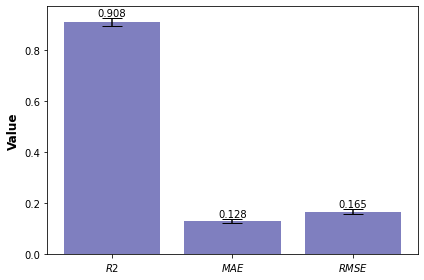

In [19]:
Metrics = ['$R2$',  '$MAE$', '$RMSE$']
x_pos = np.arange(len(Metrics))
CTEs = [np.mean(r2_cv_scores), np.mean(mae_cv_scores),  np.mean(rmse_cv_scores)]
error = [np.std(r2_cv_scores),  np.std(mae_cv_scores), np.std(rmse_cv_scores)]
CTEs = [round(metric, 3) for metric in CTEs]

fig, ax = plt.subplots(figsize =(6, 4))
bars = ax.bar(x_pos, CTEs, yerr=error, align='center', color = 'navy', alpha=.5, ecolor='black', capsize=10)
ax.set_ylabel('Value', fontweight ='bold', fontsize = 12)
ax.bar_label(bars)
ax.set_xticks(x_pos)
ax.set_xticklabels(Metrics, fontweight ='bold' ,fontsize = 10)
ax.yaxis.grid(False)

plt.tight_layout()
plt.show()

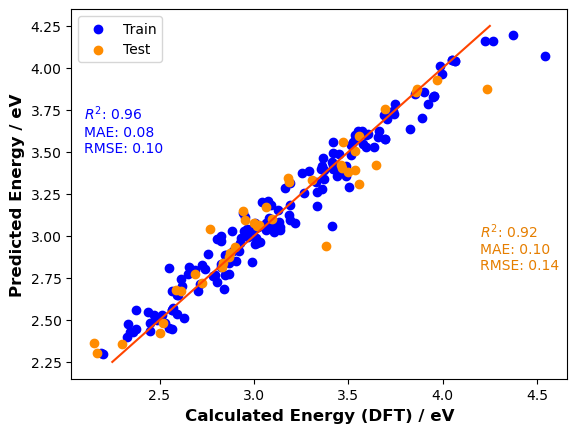

In [11]:
fold = 2


plt.plot(figsize =(6, 4))

plt.scatter(y[train_idx[fold]], Train_pred[fold], color = 'blue', label = 'Train')
plt.scatter(y[test_idx[fold]], Test_pred[fold], color = 'darkorange', label = 'Test')
plt.xlabel("Calculated Energy (DFT) / eV", fontweight ='bold', fontsize = 12)
plt.ylabel("Predicted Energy / eV", fontweight ='bold', fontsize = 12)
plt.legend()

plt.plot( [2.25, 4.25],[2.25, 4.25], color = 'orangered' )

plt.text(2.1, 3.5, f'$R^2$: {R2_train[fold]:.2f} \n\
MAE: {MAE_train[fold]:.2f} \n\
RMSE: {RMSE_train[fold]:.2f}', color = 'b')

plt.text(4.2, 2.8, f'$R^2$: {R2_test[fold]:.2f} \n\
MAE: {MAE_test[fold]:.2f} \n\
RMSE: {RMSE_test[fold]:.2f}', color = '#e67e00')

plt.show()

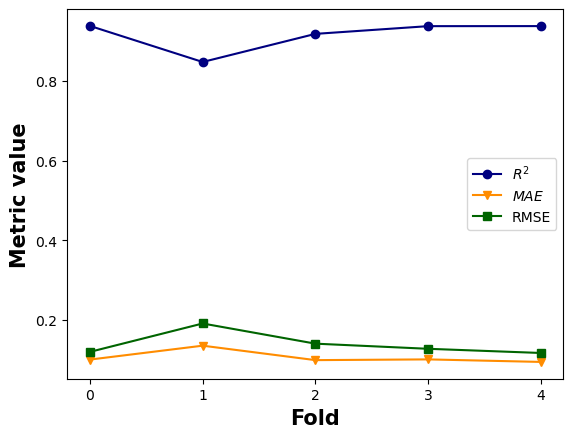

In [12]:
plt.plot(figsize =(6, 4))
plt.plot(range(len(train_idx)), R2_test, 'o-', label = '$R^2$', color = 'navy')
plt.plot(range(len(train_idx)), MAE_test, 'v-', label = '$MAE$', color = 'darkorange')
plt.plot(range(len(train_idx)), RMSE_test, 's-', label = 'RMSE', color = 'darkgreen')
plt.xticks(range(len(train_idx)), range(5))

plt.xlabel('Fold', fontweight ='bold', fontsize = 15)
plt.ylabel('Metric value', fontweight ='bold', fontsize = 15)
plt.legend()
plt.show()

In [13]:
Metrics = ['$R^2$', '$MAE$', '$RMSE$']
x_pos = np.arange(len(Metrics))
CTEs = [mean_R2_test, mean_MAE_test, mean_RMSE_test]
error = [std_R2_test, std_MAE_test, std_RMSE_test]

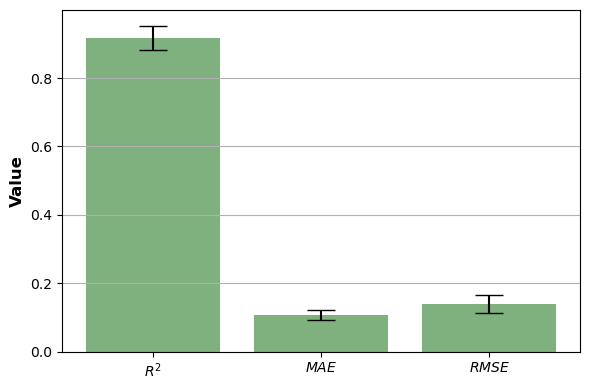

In [14]:
fig, ax = plt.subplots(figsize =(6, 4))
ax.bar(x_pos, CTEs, yerr=error, align='center', color = 'darkgreen', alpha=.5, ecolor='black', capsize=10)
ax.set_ylabel('Value', fontweight ='bold', fontsize = 12)
ax.set_xticks(x_pos)
ax.set_xticklabels(Metrics,  fontsize = 10)
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

In [19]:
df = pd.DataFrame(list(zip(R2_test, MAE_test, RMSE_test)), columns = ['R2', 'MAE', 'RMSE'])
max = pd.DataFrame(np.transpose(np.array(df.max()))).T
max.columns = df.columns
max = max.rename(index={0:'Max'})
min = pd.DataFrame(np.transpose(np.array(df.min()))).T
min.columns = df.columns
min = min.rename(index={0:'Min'})
mean = pd.DataFrame(np.transpose(np.array(df.mean()))).T
mean.columns = df.columns
mean = mean.rename(index={0:'Mean'})
df = pd.concat([df,max,min,mean], axis = 0)
df.index.name = 'fold'
df

,R2,MAE,RMSE
fold,,,
0,0.938589,0.100618,0.119972
1,0.848017,0.135533,0.191273
2,0.918621,0.099238,0.140600
3,0.938019,0.101088,0.127711
4,0.938141,0.094739,0.117199
Max,0.938589,0.135533,0.191273
Min,0.848017,0.094739,0.117199
Mean,0.916278,0.106243,0.139351
